# Decision Tree

---

This data set contains information of cars purchased at the Auction.
<br>
We will use this file to predict the quality of buying decisions and visualize decision processes.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
Auction: Auction provider at which the  vehicle was purchased<br>
Color: Vehicle Color<br>
IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase<br>
MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day<br>
Size: The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName:Identifies if the manufacturer is one of the top three American manufacturers<br>
VehBCost: Acquisition cost paid for the vehicle at time of purchase<br>
VehicleAge: The Years elapsed since the manufacturer's year<br>
VehOdo: The vehicles odometer reading<br>
WarrantyCost: Warranty price (term=36month  and millage=36K)<br>
WheelType: The vehicle wheel type description (Alloy, Covers)<br>
<br>
Target variable: **IsBadBuy**

###1. Upload and clean data

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [3]:
# Read data
car_kick = pd.read_csv("/content/drive/MyDrive/IS670_data/car_kick.csv")
car_kick

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,IsBadBuy
0,1289952000,2006,4,51954,6197,7062,9605,10426,5341,6351,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0
1,1242691200,2005,4,89127,3688,4783,4483,5666,3688,4783,...,2,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0
2,1248220800,2006,3,71271,6897,8449,7949,9625,6868,8549,...,1,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0
3,1285718400,2008,2,83338,7878,8925,11723,13026,7801,8704,...,2,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0
4,1237334400,2007,2,58698,8800,10091,10004,11398,7355,8543,...,1,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,1285804800,2008,2,56072,6255,6972,9852,10567,6326,7126,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,22808,77061,TX,0,1
67207,1274918400,2004,6,94232,8359,9645,12042,13302,7505,8188,...,1,Alloy,'TOP LINE ASIAN','MEDIUM SUV',OTHER,17675,28273,NC,0,1
67208,1280448000,2004,6,79534,2805,3826,6132,6871,3106,4479,...,1,Alloy,AMERICAN,MEDIUM,GM,18880,37771,TN,0,1
67209,1285200000,2003,7,79394,4042,5296,7335,8983,3534,4732,...,2,Covers,AMERICAN,'MEDIUM SUV',GM,23657,92337,CA,0,1


In [4]:
car_kick.keys()

Index(['PurchDate', 'VehYear', 'VehicleAge', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost', 'WarrantyCost', 'Auction', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'Nationality', 'Size', 'TopThreeAmericanName', 'BYRNO', 'VNZIP1',
       'VNST', 'IsOnlineSale', 'IsBadBuy'],
      dtype='object')

In [5]:
# Select the desired columns only
desired_columns = ['Auction', 'Color', 'IsBadBuy', 'MMRCurrentAuctionAveragePrice', 'Size','TopThreeAmericanName',
'VehBCost', 'VehicleAge', 'VehOdo', 'WarrantyCost', 'WheelType']
car_kick_desired = car_kick [desired_columns]

In [6]:
# Replacing 1 with Yes and 0 with No in the target column IsBadBuy
carAuction = car_kick_desired.copy() #why?
carAuction.loc[:, 'IsBadBuy'] = carAuction['IsBadBuy'].replace({0: 'No', 1: 'Yes'})

In [7]:
# Show the head rows of a data frame
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,MANHEIM,SILVER,No,5341,MEDIUM,CHRYSLER,6500,4,51954,1086,Covers
1,ADESA,SILVER,No,3688,MEDIUM,FORD,3680,4,89127,983,Covers
2,MANHEIM,RED,No,6868,LARGE,GM,7170,3,71271,1974,Alloy
3,MANHEIM,BLACK,No,7801,LARGE,GM,7670,2,83338,2152,Covers
4,ADESA,WHITE,No,7355,LARGE,GM,7165,2,58698,1500,Alloy


In [8]:
# Examine missing values again
carAuction.isnull().sum()

Auction                          0
Color                            0
IsBadBuy                         0
MMRCurrentAuctionAveragePrice    0
Size                             0
TopThreeAmericanName             0
VehBCost                         0
VehicleAge                       0
VehOdo                           0
WarrantyCost                     0
WheelType                        0
dtype: int64

In [9]:
# Examine variable type
carAuction.dtypes

Auction                          object
Color                            object
IsBadBuy                         object
MMRCurrentAuctionAveragePrice     int64
Size                             object
TopThreeAmericanName             object
VehBCost                          int64
VehicleAge                        int64
VehOdo                            int64
WarrantyCost                      int64
WheelType                        object
dtype: object

In [10]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [11]:
# Examine variable type
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName             category
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
dtype: object

###2. Partition the data set for Decision Tree model

In [12]:
# Create dummy variables
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,...,Size_LARGE,Size_MEDIUM,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special
0,No,5341,6500,4,51954,1086,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,No,3688,3680,4,89127,983,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,No,6868,7170,3,71271,1974,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,No,7801,7670,2,83338,2152,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
4,No,7355,7165,2,58698,1500,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,Yes,6326,6680,2,56072,1086,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
67207,Yes,7505,8265,6,94232,909,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
67208,Yes,3106,4950,6,79534,1506,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
67209,Yes,3534,5220,7,79394,3967,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [13]:
# Examine the porportion of target variable for data set
target = carAuction['IsBadBuy']
print(target.value_counts(normalize=True))

IsBadBuy
No     0.904539
Yes    0.095461
Name: proportion, dtype: float64


In [14]:
# Partition the data
predictors = carAuction.drop(['IsBadBuy'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(47047, 38) (20164, 38) (47047,) (20164,)


In [15]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'No']
minority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'Yes']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['IsBadBuy'])
target_train = balanced_data['IsBadBuy']

In [16]:
# Examine the porportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

IsBadBuy
No     0.5
Yes    0.5
Name: proportion, dtype: float64 (8838,)


In [17]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

IsBadBuy
No     0.900962
Yes    0.099038
Name: proportion, dtype: float64


## 3. Decision Tree model prediction

In [18]:
# Build a decision tree model on training data with max_depth = 2
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 2)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'VehicleAge <= 4.5\nentropy = 1.0\nsamples = 8838\nvalue = [4419, 4419]\nclass = No'),
 Text(0.25, 0.5, 'VehicleAge <= 2.5\nentropy = 0.958\nsamples = 4577\nvalue = [2840, 1737]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.81\nsamples = 1060\nvalue = [796, 264]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.981\nsamples = 3517\nvalue = [2044, 1473]\nclass = No'),
 Text(0.75, 0.5, 'VehBCost <= 4782.5\nentropy = 0.951\nsamples = 4261\nvalue = [1579, 2682]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.869\nsamples = 1411\nvalue = [410, 1001]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.977\nsamples = 2850\nvalue = [1169, 1681]\nclass = Yes')]

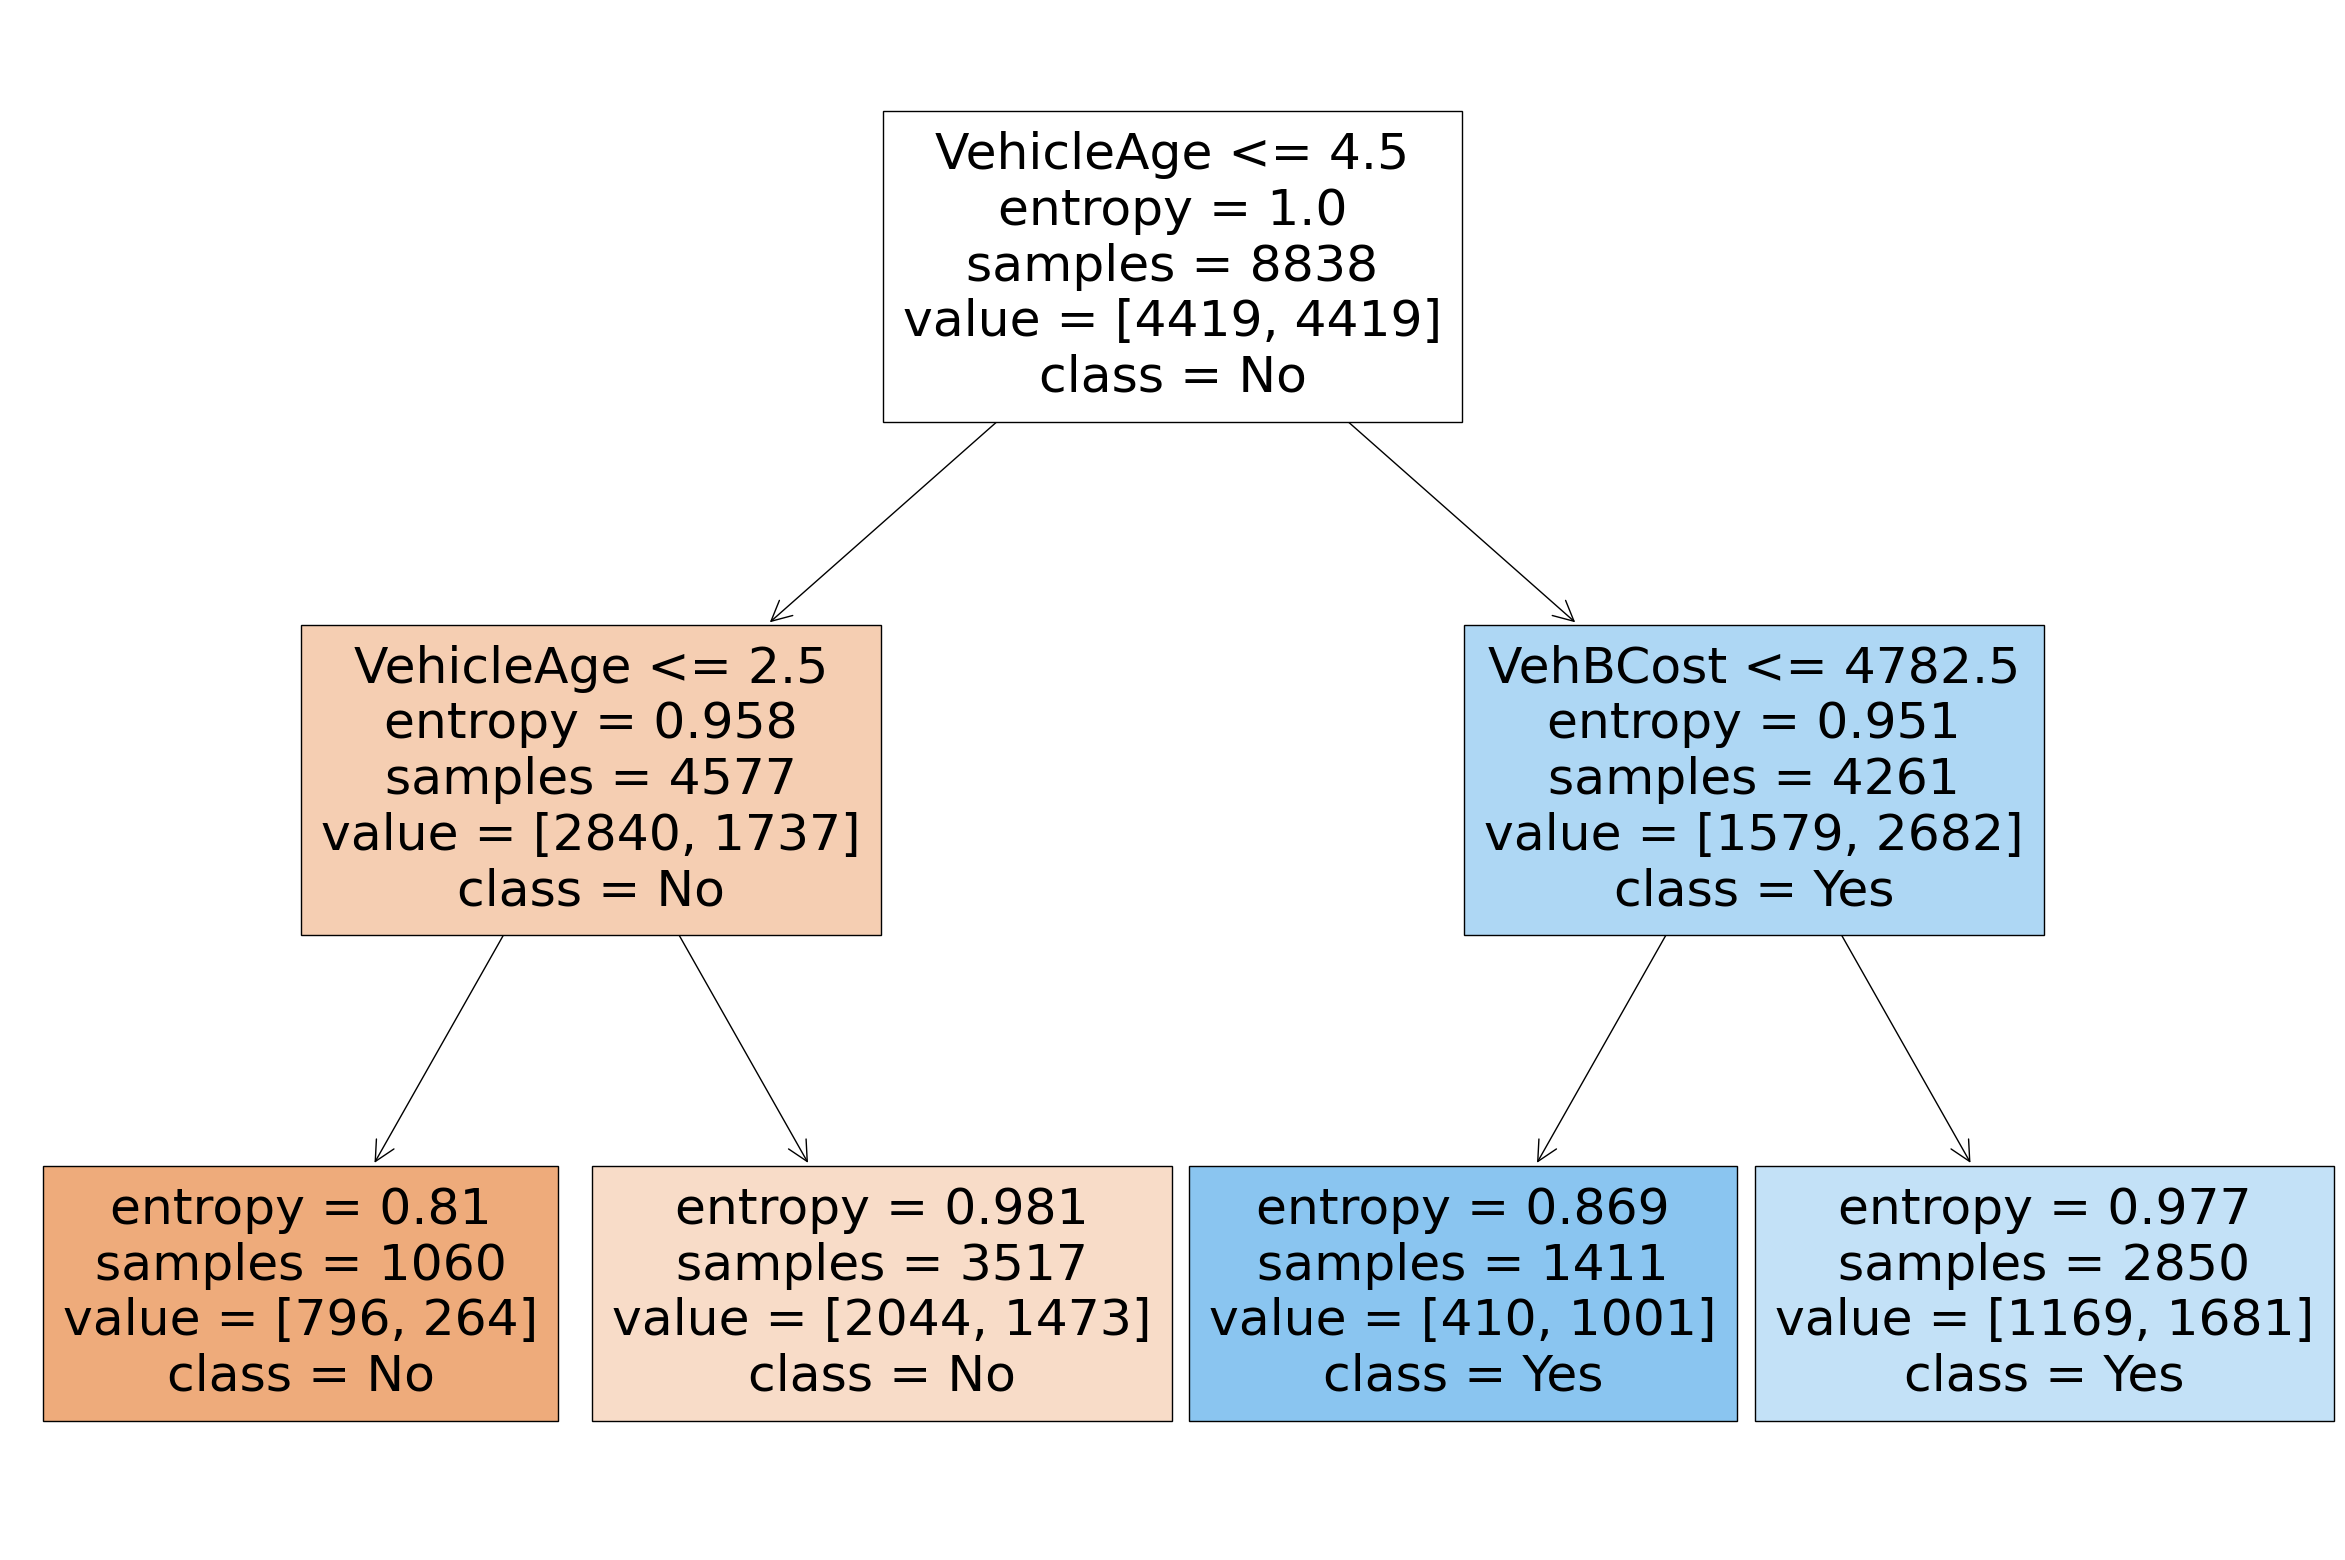

In [19]:
# Plot the tree (0.5 pts)
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [20]:
# Text version of decision tree (0.5 pts)
print(tree.export_text(model, feature_names=list(carAuction.columns)[1:]))

|--- VehicleAge <= 4.50
|   |--- VehicleAge <= 2.50
|   |   |--- class: No
|   |--- VehicleAge >  2.50
|   |   |--- class: No
|--- VehicleAge >  4.50
|   |--- VehBCost <= 4782.50
|   |   |--- class: Yes
|   |--- VehBCost >  4782.50
|   |   |--- class: Yes



Q1. How many decision nodes and how many leaf nodes are in the tree?  (0.5 pts)<br>


There are 3 decision nodes and 4 leaf nodes.

Q2. Compare to a decision tree with 7 decision nodes and 8 leaf nodes, is it more or less complex? Give reasons for your answer. (1 pt)<br>


It is less complex as compared to 7 decision nodes and 8 leaf nodes as it is easy to analyse the infromation.

Q3. What is the predictor that first splits the tree? How the decision tree selects the first predictor to split? (1 pt)<br>

Entropy is the first predictor that first splits the tree with class No. As the entropy is 1.0 which means 50-50 ratio, which led to split.

Q4. Find one path in the tree to a leaf node that is classified to IsBadBuy = 'Yes'. What is this path/rule's misclassification error rate? (1 pt)<br>

The path of VehicleAge - vehBcost - entrophy of 0.869 is classified to IsbadBuy. the error rate is 0.29

In [21]:
# Make predictions on testing data (0.5 pts)
prediction_on_test = model.predict(predictors_test)

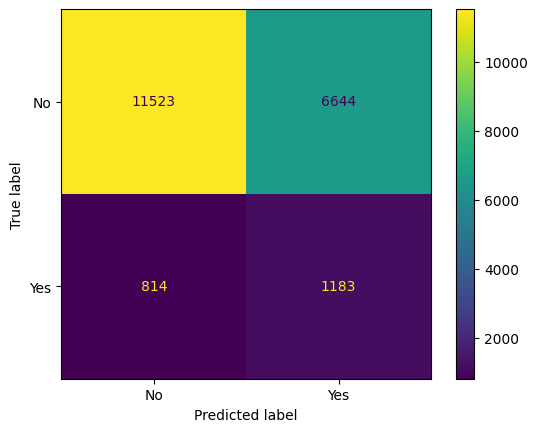

In [22]:
# Examine the evaluation results on testing data: confusion_matrix (0.5 pts)
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

Q5. On the testing set, how many bad buy cars are predicted as Not bad buy? (0.5 pts)<br>


In [23]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (0.5 pts)
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.93      0.63      0.76     18167
         Yes       0.15      0.59      0.24      1997

    accuracy                           0.63     20164
   macro avg       0.54      0.61      0.50     20164
weighted avg       0.86      0.63      0.70     20164



Q6. Does the decision tree model have better performance on majority (IsBadBuy = 'No') or minority class (IsBadBuy = 'Yes')? why? (1 pt)<br>

The decision tree model have better performance on minority class as they have 814 yes which were actually No.

Q7. Explain the overal performance of this model. Is this a good model? How can we improve it? (1 pt)

The overall performance is not good as for Yes the precision , recall and F1-score is low. improvement can be brought by getting

Q8. Build a decision tree model using training data, setting the maximum depth to 3, and assess its performance against the earlier model. Discuss which model you would favor and why. (2 pts)

In [24]:
# Q8 The model with max_depth is more preferable as we get one more layer to analyze and with more infromation we get a clearer idea of making a desicion
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [25]:
!jupyter nbconvert --to html "/content/drive/MyDrive/IS670_lab03.ipynb"

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/IS670_lab03.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_